
<a href='https://huntsman.usu.edu/directory/jahangiry-pedram'> <img src="logo.jpg" /></a>

___
## Pedram Jahangiry 



# Seaborn visualization


Topics to be covered: 
1. Distribution Plots
    * distplot
    * jointplot
    * pairplot
2. Categorical plots
    * barplot
    * countplot
    * boxplot
3. Heatmaps    
4. Facet grids
5. Regression plots
    


## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seaborn comes with built-in data sets!
sns.get_dataset_names()

C:\Users\jahan\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\jahan\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
mpg = sns.load_dataset('mpg')

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
mpg.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 1. distribution plots

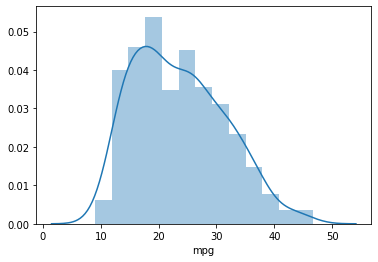

In [7]:
sns.distplot(mpg['mpg'])

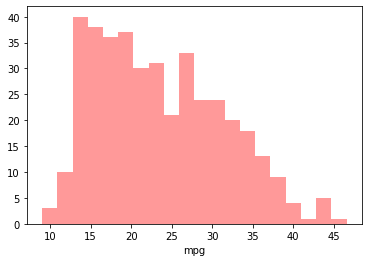

In [8]:
sns.distplot(mpg['mpg'],kde=False,bins=20, color="red")

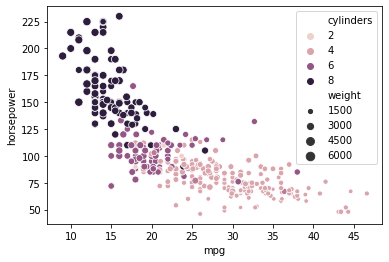

In [9]:
sns.scatterplot('mpg', 'horsepower', data=mpg, hue='cylinders', size='weight') 

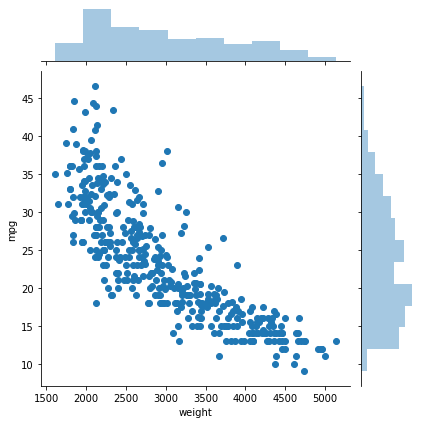

In [10]:
sns.jointplot(x='weight',y='mpg',data=mpg)

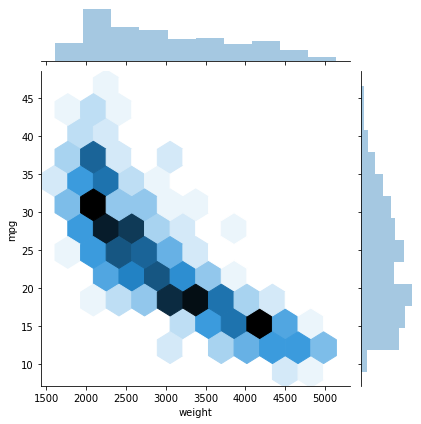

In [11]:
sns.jointplot(x='weight',y='mpg',data=mpg,kind='hex')

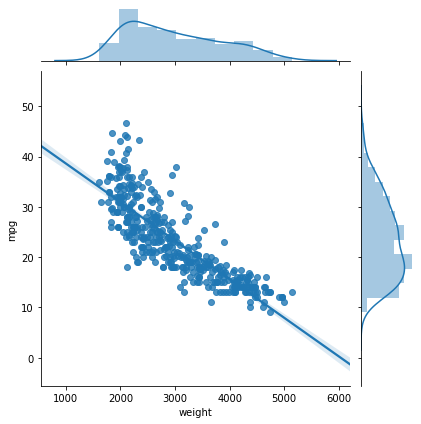

In [12]:
sns.jointplot(x='weight',y='mpg',data=mpg ,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

In [13]:
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
df = mpg[['mpg','cylinders','weight']]
df.head(5)

,mpg,cylinders,weight
0,18.0,8,3504
1,15.0,8,3693
2,18.0,8,3436
3,16.0,8,3433
4,17.0,8,3449


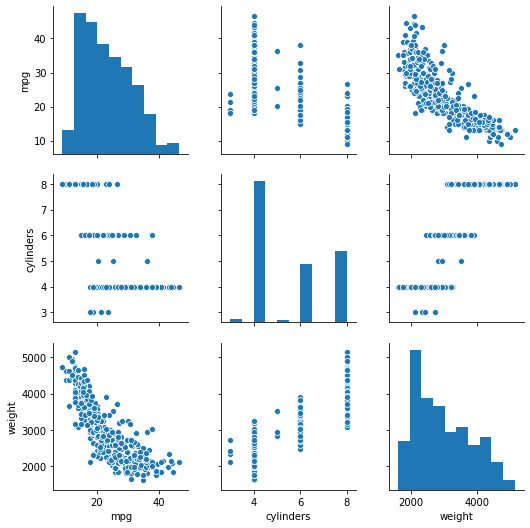

In [15]:
sns.pairplot(df) # pairplot look at the joint relationship between numerical variables in the dataframe. 

In [16]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

C:\Users\jahan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jahan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


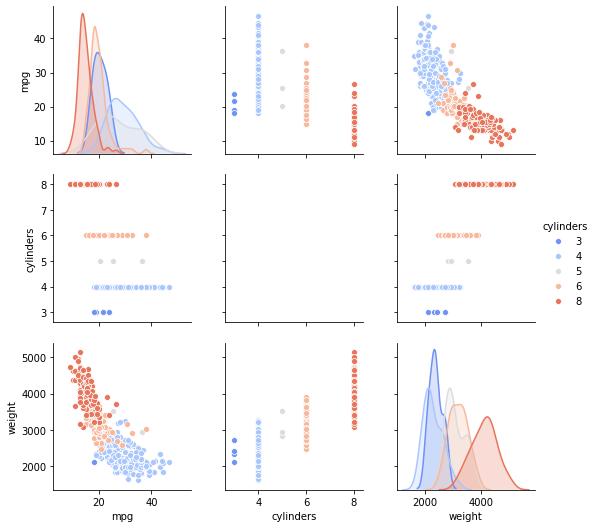

In [17]:
sns.pairplot(df,hue='cylinders',palette='coolwarm') 
# hue is used for categorical variables
# palette specifies the colors

## 2. Categorical plots

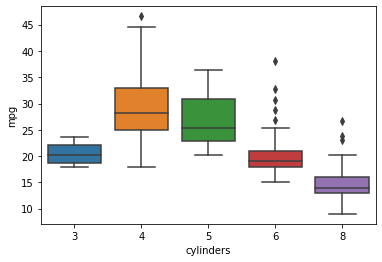

In [18]:
sns.boxplot(x='cylinders', y='mpg', data=mpg)

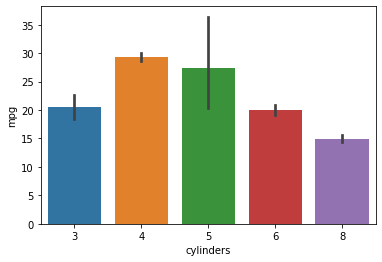

In [24]:
sns.barplot(x='cylinders', y='mpg', data=mpg)
# barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean.

# the black vertical lines are the error bars. 

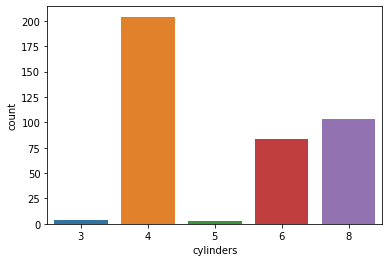

In [25]:
sns.countplot(x='cylinders',data=mpg)

## 3. Heatmap

In [26]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


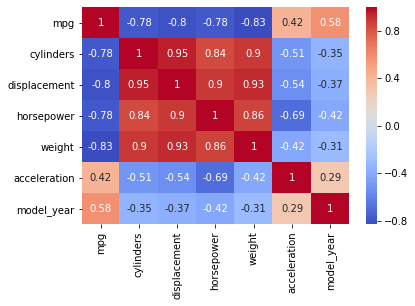

In [27]:
sns.heatmap(mpg.corr(), cmap='coolwarm',annot=True)

## 4. Facet grids

In [28]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [29]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

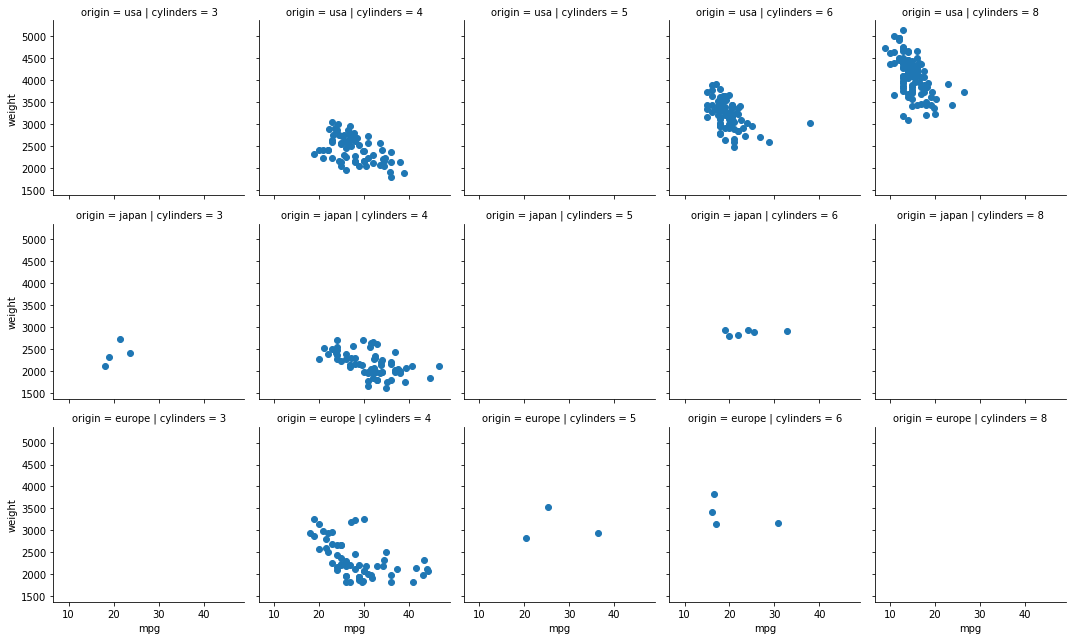

In [30]:
g = sns.FacetGrid(mpg, col="cylinders", row='origin')
g = g.map(plt.scatter, "mpg", "weight") # Apply a plotting function to each facet's subset of the data.

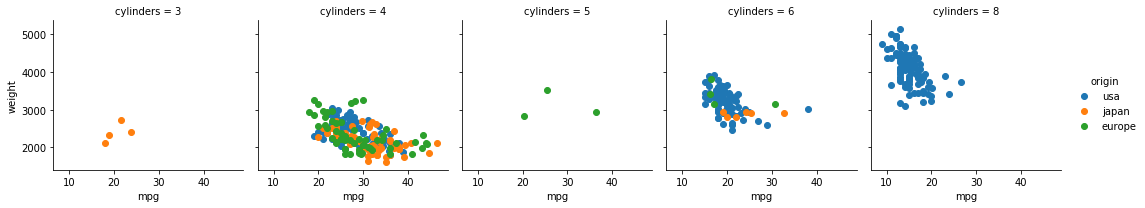

In [31]:
g = sns.FacetGrid(mpg, col="cylinders", hue='origin')
g = g.map(plt.scatter, "mpg", "weight").add_legend()

## 5. Regression plots

In [32]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


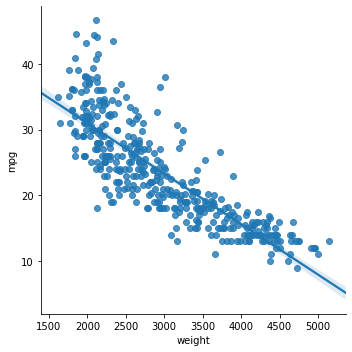

In [33]:
sns.lmplot(x='weight',y='mpg',data=mpg)

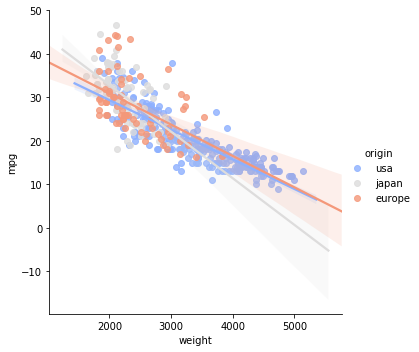

In [34]:
sns.lmplot(x='weight',y='mpg',data=mpg, hue='origin', palette='coolwarm')

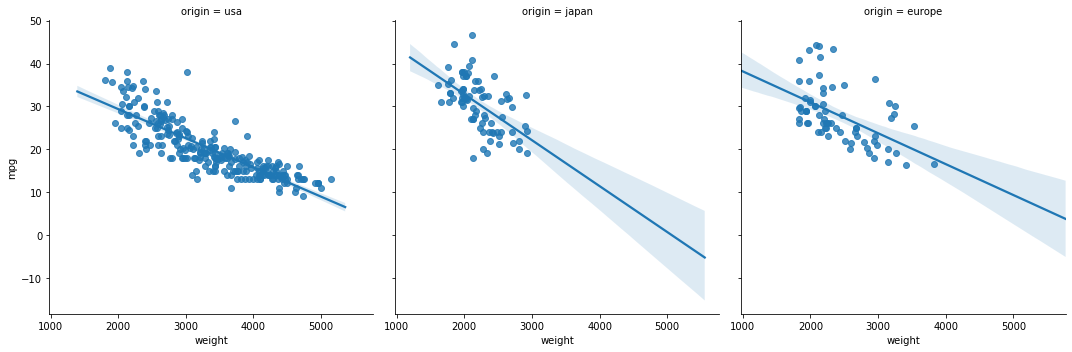

In [35]:
sns.lmplot(x='weight',y='mpg',data=mpg, col='origin')

In [37]:
import pandas as pd
df = pd.read_csv('GDP.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
DATE    290 non-null object
GDP     290 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [38]:
df.tail(10)

,DATE,GDP
280,2017-01-01,19190.431
281,2017-04-01,19356.649
282,2017-07-01,19611.704
283,2017-10-01,19918.910
284,2018-01-01,20163.159
285,2018-04-01,20510.177
286,2018-07-01,20749.752
287,2018-10-01,20897.804
288,2019-01-01,21098.827
289,2019-04-01,21339.121


In [49]:
df.iloc[-10:]

,DATE,GDP
280,2017-01-01,19190.431
281,2017-04-01,19356.649
282,2017-07-01,19611.704
283,2017-10-01,19918.910
284,2018-01-01,20163.159
285,2018-04-01,20510.177
286,2018-07-01,20749.752
287,2018-10-01,20897.804
288,2019-01-01,21098.827
289,2019-04-01,21339.121


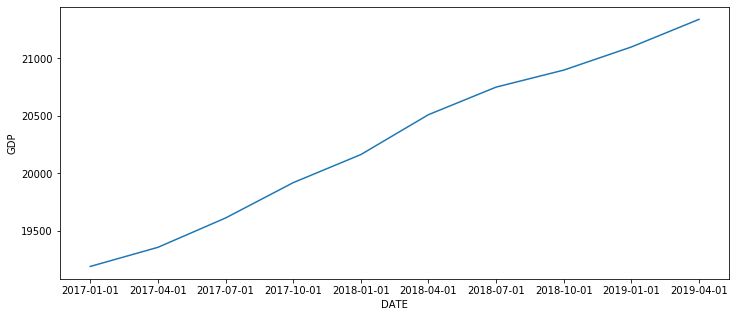

In [40]:
plt.figure(figsize=(12,5))
sns.lineplot(x="DATE", y="GDP", data=df.tail(10))